In [104]:
cigs <- read.csv("data/smoke.csv")

In [2]:
head(cigs)

,CIGS,INCOME,CIGPRIC,EDUC,AGE,RESTAURN
,<int>,<int>,<dbl>,<dbl>,<int>,<int>
1,0,20000,60.506,16.0,46,0
2,0,30000,57.883,16.0,40,0
3,3,30000,57.664,12.0,58,0
4,0,20000,57.883,13.5,30,0
5,0,20000,58.320,10.0,17,0
6,0,6500,59.340,6.0,86,0


In [6]:
lm1 <- lm(CIGS ~ log(INCOME) + log(CIGPRIC) + EDUC + AGE + I(AGE^2) + RESTAURN, data = cigs)

In [25]:
sresid <- sqrt(mean((lm1$residuals)^2))

In [3]:
library(ggplot2)

## mark one eyeball - do we see heteroskedasticity in any of the variables

Yes - we readily see a funnel shape in residuals vs INCOME and vs AGE^2

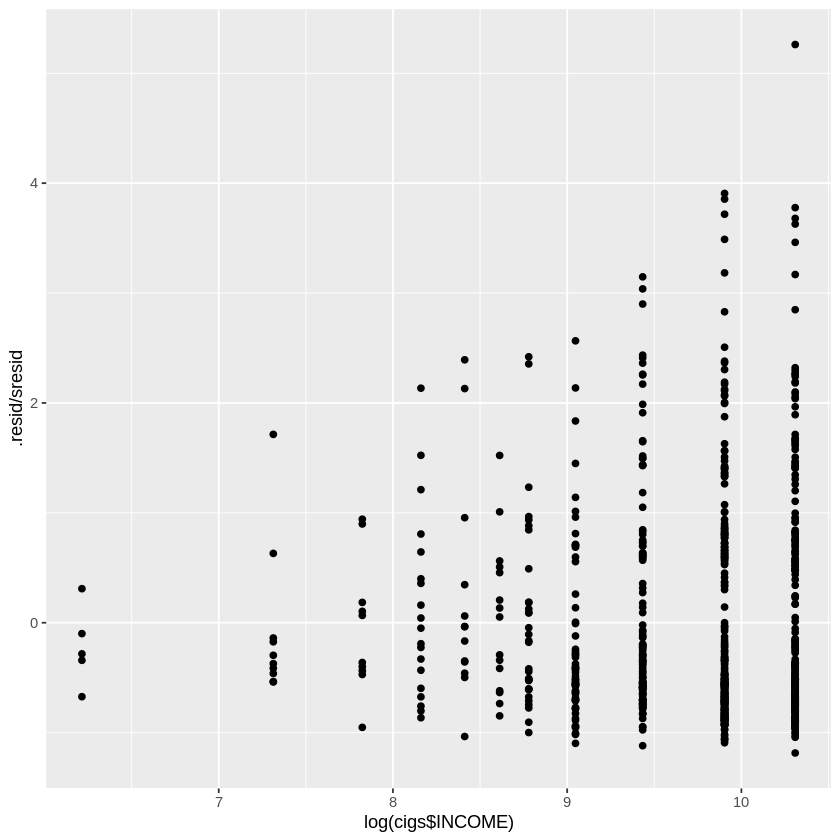

In [27]:
ggplot(lm1, aes(x = log(cigs$INCOME), y = .resid/sresid)) + geom_point()

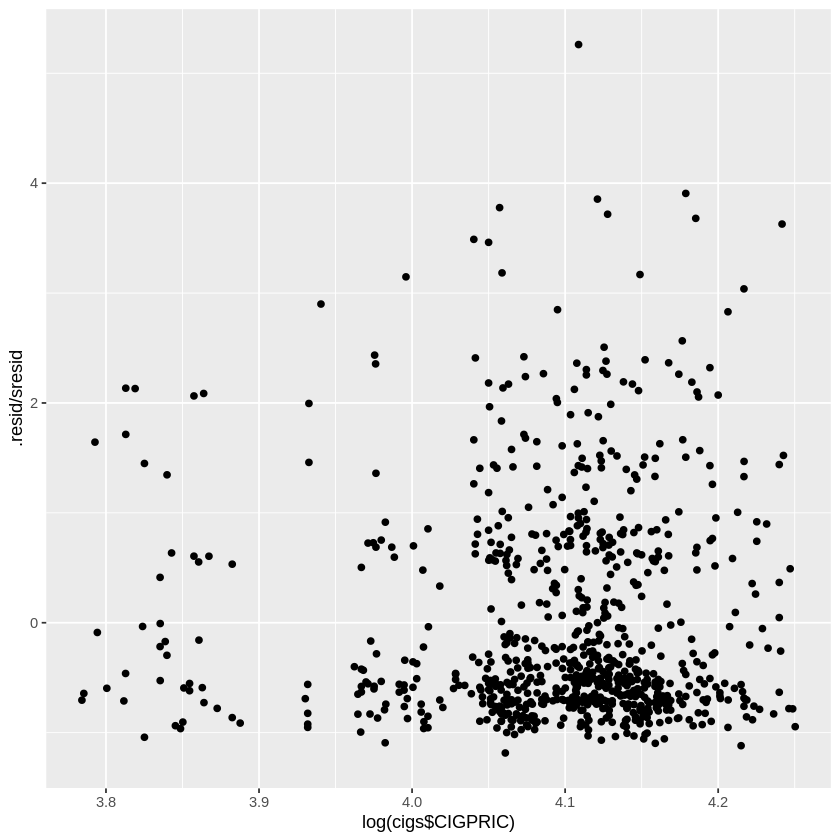

In [32]:
ggplot(lm1, aes(x = log(cigs$CIGPRIC), y = .resid/sresid)) + geom_point() 

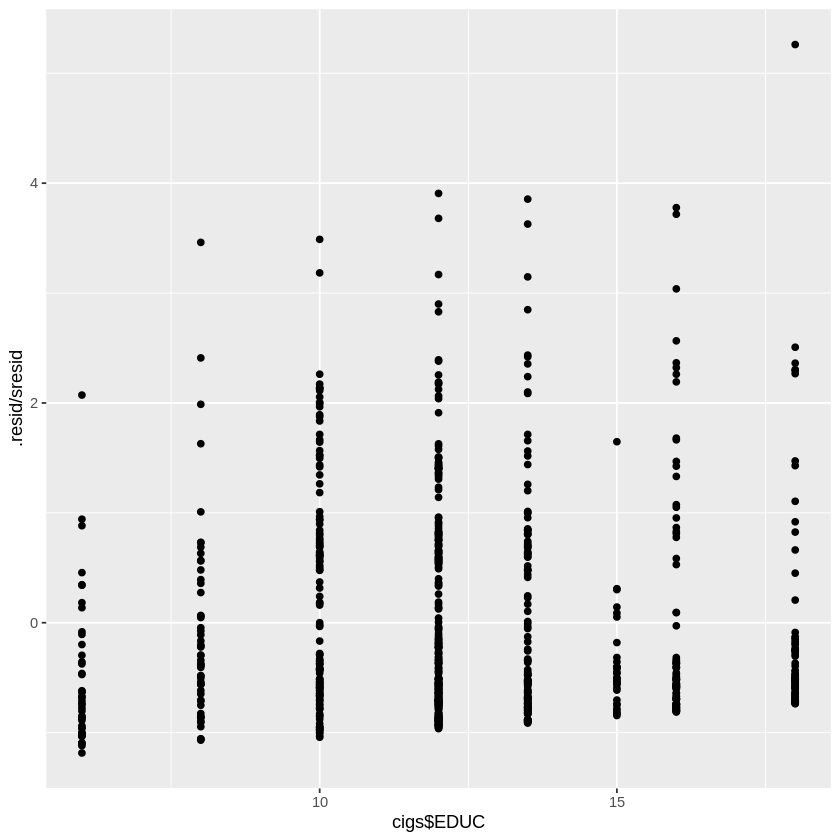

In [29]:
ggplot(lm1, aes(x = cigs$EDUC, y = .resid/sresid)) + geom_point()

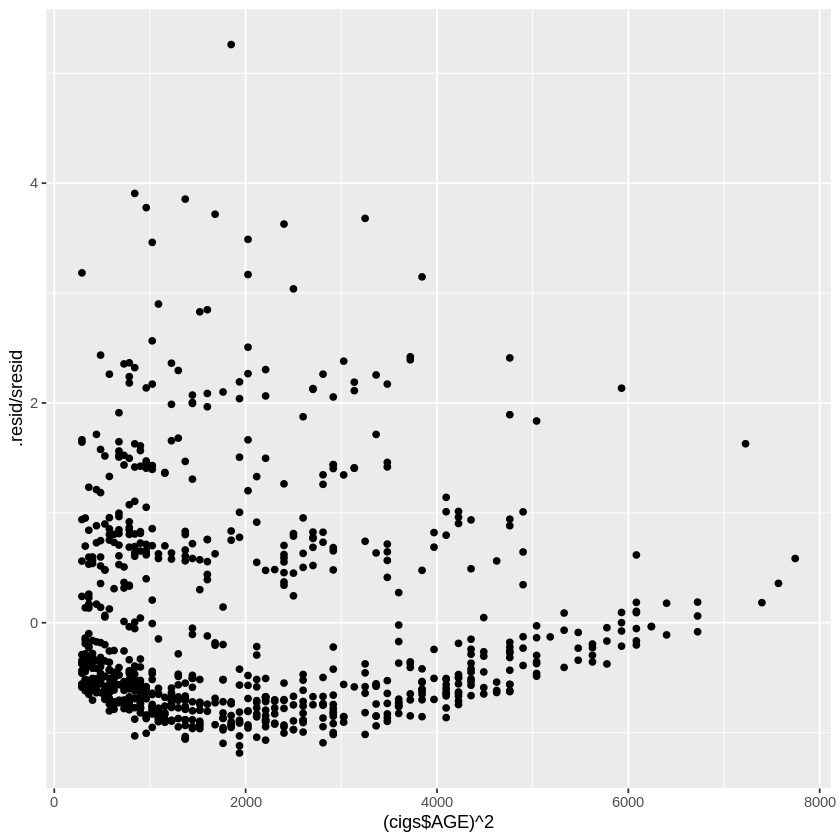

In [30]:
ggplot(lm1, aes(x = (cigs$AGE)^2, y = .resid/sresid)) + geom_point()

## studentize model residuals, build aux regression

In [46]:
cigs$sresid <- (lm1$residuals)^2/sresid - 1

In [47]:
bplm1 <- lm(sresid ~ log(INCOME) + log(CIGPRIC) + EDUC + AGE + I(AGE^2) + RESTAURN, data = cigs)

In [58]:
summary(bplm1)


Call:
lm(formula = sresid ~ log(INCOME) + log(CIGPRIC) + EDUC + AGE + 
    I(AGE^2) + RESTAURN, data = cigs)

Residuals:
   Min     1Q Median     3Q    Max 
-20.24  -9.55  -7.04  -2.93 349.74 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -48.675596  48.888726  -0.996   0.3197    
log(INCOME)    1.846059   1.477673   1.249   0.2119    
log(CIGPRIC)   4.568731  11.722055   0.390   0.6968    
EDUC          -0.178640   0.339230  -0.527   0.5986    
AGE            1.454872   0.325108   4.475 8.75e-06 ***
I(AGE^2)      -0.016093   0.003539  -4.547 6.27e-06 ***
RESTAURN      -5.333328   2.257359  -2.363   0.0184 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 27.22 on 800 degrees of freedom
Multiple R-squared:  0.03997,	Adjusted R-squared:  0.03277 
F-statistic: 5.552 on 6 and 800 DF,  p-value: 1.189e-05


## build Chi-sq statistic from R^2

In [52]:
0.03997* nrow(cigs)

[1] 32.25579

## p-value is very low, reject the null of homoskedasticity

In [53]:
pchisq(0.03997* nrow(cigs), df = bplm1$rank -1, lower.tail = FALSE)

[1] 1.457471e-05

# White test

In [56]:
wlm1 <- lm(sresid ~ log(INCOME) + log(CIGPRIC) + EDUC + AGE + RESTAURN
           +  I(log(INCOME)^2) + I(log(INCOME)*log(CIGPRIC)) + I(log(INCOME)*EDUC) + I(log(INCOME)*AGE) + I(log(INCOME)*RESTAURN)
                               + I(log(CIGPRIC)*log(CIGPRIC)) + I(log(CIGPRIC)*EDUC) + I(log(CIGPRIC)*AGE) + I(log(CIGPRIC)*RESTAURN)
                                                              + I(EDUC*EDUC) + I(EDUC*AGE) + I(EDUC*RESTAURN)
                                                                             + I(AGE*AGE) + I(AGE*RESTAURN)
         , data = cigs)

In [57]:
summary(wlm1)


Call:
lm(formula = sresid ~ log(INCOME) + log(CIGPRIC) + EDUC + AGE + 
    RESTAURN + I(log(INCOME)^2) + I(log(INCOME) * log(CIGPRIC)) + 
    I(log(INCOME) * EDUC) + I(log(INCOME) * AGE) + I(log(INCOME) * 
    RESTAURN) + I(log(CIGPRIC) * log(CIGPRIC)) + I(log(CIGPRIC) * 
    EDUC) + I(log(CIGPRIC) * AGE) + I(log(CIGPRIC) * RESTAURN) + 
    I(EDUC * EDUC) + I(EDUC * AGE) + I(EDUC * RESTAURN) + I(AGE * 
    AGE) + I(AGE * RESTAURN), data = cigs)

Residuals:
   Min     1Q Median     3Q    Max 
-22.41  -9.72  -6.94  -1.85 349.92 

Coefficients:
                                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)                     2.053e+03  1.538e+03   1.334    0.182    
log(INCOME)                    -1.003e+02  6.802e+01  -1.474    0.141    
log(CIGPRIC)                   -7.462e+02  7.288e+02  -1.024    0.306    
EDUC                           -8.993e+00  1.880e+01  -0.478    0.632    
AGE                             2.233e-01  2.763e+00   0.081    0.936    
RESTAUR

## Chi-Sq statistic

In [66]:
0.05296*nrow(cigs)/2

[1] 21.36936

## p-value; reject homoskedasticity

In [65]:
pchisq((0.05296/2)* nrow(cigs), df = wlm1$rank -1, lower.tail = FALSE)

[1] 0.3167552

In [61]:
lm2 <- lm( CIGS ~ log(INCOME) + log(CIGPRIC) + EDUC + AGE + RESTAURN
           +  I(log(INCOME)^2) + I(log(INCOME)*log(CIGPRIC)) + I(log(INCOME)*EDUC) + I(log(INCOME)*AGE) + I(log(INCOME)*RESTAURN)
                               + I(log(CIGPRIC)*log(CIGPRIC)) + I(log(CIGPRIC)*EDUC) + I(log(CIGPRIC)*AGE) + I(log(CIGPRIC)*RESTAURN)
                                                              + I(EDUC*EDUC) + I(EDUC*AGE) + I(EDUC*RESTAURN)
                                                                             + I(AGE*AGE) + I(AGE*RESTAURN)
          , data=cigs)

In [64]:
bptest(lm2,studentize=TRUE)


	studentized Breusch-Pagan test

data:  lm2
BP = 39.557, df = 19, p-value = 0.003739


# Q4c - transform to correct for heteroskedasticity

In [97]:
cigs$sresid2 <- log((lm1$residuals)^2)

In [98]:
auxlm1 <- lm(sresid2 ~ log(INCOME) + log(CIGPRIC) + EDUC + AGE + I(AGE^2) + RESTAURN, data=cigs)

In [99]:
summary(auxlm1)


Call:
lm(formula = sresid2 ~ log(INCOME) + log(CIGPRIC) + EDUC + AGE + 
    I(AGE^2) + RESTAURN, data = cigs)

Residuals:
     Min       1Q   Median       3Q      Max 
-11.2186  -0.2237  -0.0227   0.2951   4.9588 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -1.9206930  2.5630331  -0.749  0.45385    
log(INCOME)   0.2915403  0.0774683   3.763  0.00018 ***
log(CIGPRIC)  0.1954187  0.6145387   0.318  0.75057    
EDUC         -0.0797036  0.0177844  -4.482 8.49e-06 ***
AGE           0.2040054  0.0170441  11.969  < 2e-16 ***
I(AGE^2)     -0.0023921  0.0001855 -12.893  < 2e-16 ***
RESTAURN     -0.6270114  0.1183440  -5.298 1.51e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.427 on 800 degrees of freedom
Multiple R-squared:  0.2474,	Adjusted R-squared:  0.2417 
F-statistic: 43.82 on 6 and 800 DF,  p-value: < 2.2e-16


## transformed variables

In [101]:
cigs$z1 <- 1/predict(auxlm1)
cigs$z2 <- log(cigs$INCOME)/predict(auxlm1)
cigs$z3 <- log(cigs$CIGPRIC)/predict(auxlm1)
cigs$z4 <- cigs$EDUC/predict(auxlm1)
cigs$z5 <- cigs$AGE/predict(auxlm1)
cigs$z6 <- (cigs$AGE)^2/predict(auxlm1)
cigs$z7 <- cigs$RESTAURN/predict(auxlm1)
cigs$y <- cigs$CIGS/predict(auxlm1)

## OLS in the transformed variables

In [102]:
lm2 <- lm(y~z1+z2+z3+z4+z5+z6+z7,data=cigs)

In [103]:
summary(lm2)


Call:
lm(formula = y ~ z1 + z2 + z3 + z4 + z5 + z6 + z7, data = cigs)

Residuals:
   Min     1Q Median     3Q    Max 
-2.820 -2.124 -1.661  1.805 14.624 

Coefficients: (1 not defined because of singularities)
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  5.613197   1.447520   3.878 0.000114 ***
z1           0.020519  19.226951   0.001 0.999149    
z2          -0.062541   0.652244  -0.096 0.923635    
z3          -0.715025   4.935560  -0.145 0.884848    
z4           0.061743   0.163892   0.377 0.706476    
z5          -0.694637   0.294934  -2.355 0.018752 *  
z6           0.008187   0.003379   2.423 0.015632 *  
z7                 NA         NA      NA       NA    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.11 on 800 degrees of freedom
Multiple R-squared:  0.01558,	Adjusted R-squared:  0.0082 
F-statistic: 2.111 on 6 and 800 DF,  p-value: 0.04993
